In [40]:
import pandas as pd
from plotnine import *
import numpy as np
from datetime import date
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [2]:
df = pd.read_csv("EGLE-AQD-documents 2.csv")

In [5]:
df.date = pd.to_datetime(df.date,format="%Y%m%d",errors='coerce')

In [85]:
major_sources = pd.read_csv("major-sources-no-duplicates.csv")
major_sources_wayne = major_sources.query('county=="WAYNE"').srn.to_list()
major_sources = major_sources.srn.to_list()

In [31]:
df.query('doc_type.str.contains("FCE") and source_id.isin(@major_sources)').resample("3M",on="date").size().sort_index().reset_index().rename({0:'fce'},axis=1)

,date,fce
0,2013-12-31,11
1,2014-12-31,90
2,2015-12-31,136
3,2016-12-31,120
4,2017-12-31,129
5,2018-12-31,118
6,2019-12-31,109
7,2020-12-31,97
8,2021-12-31,116
9,2022-12-31,19


In [62]:
def quarters(date):
    if date.month == 1:
        return "Q1"
    if date.month == 4:
        return "Q2"
    if date.month == 7:
        return "Q3"
    if date.month == 10:
        return "Q4"

In [91]:
fce_quarters_major = df.query('doc_type.str.contains("FCE") and source_id.isin(@major_sources)').resample("Y",on="date").size().sort_index().reset_index().rename({0:'fce'},axis=1)
# fce_quarters_major['quarter'] = fce_quarters_major.date.apply(quarters)

fce_quarters_major

,date,fce
0,2013-12-31,11
1,2014-12-31,90
2,2015-12-31,136
3,2016-12-31,120
4,2017-12-31,129
5,2018-12-31,118
6,2019-12-31,109
7,2020-12-31,97
8,2021-12-31,116
9,2022-12-31,19


In [ ]:
def quarters(date):
    if date.month == 1:
        return "Q1"
    if date.month == 4:
        return "Q2"
    if date.month == 7:
        return "Q3"
    if date.month == 10:
        return "Q4"

In [88]:
fce_quarters_major_wayne = df.query('doc_type.str.contains("FCE") and source_id.isin(@major_sources_wayne)').resample("Y",on="date").size().sort_index().reset_index().rename({0:'fce'},axis=1)
# fce_quarters_major_wayne['quarter'] = fce_quarters_major_wayne.date.apply(quarters)

fce_quarters_major_wayne

,date,fce
0,2014-12-31,1
1,2015-12-31,21
2,2016-12-31,19
3,2017-12-31,24
4,2018-12-31,15
5,2019-12-31,22
6,2020-12-31,12
7,2021-12-31,5


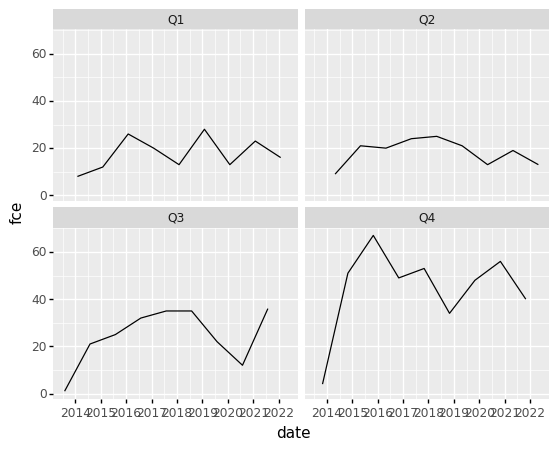

<ggplot: (313527143)>

In [80]:


(
    ggplot(fce_quarters_major,
          aes(x="date",y="fce"))
    + geom_line()
    + facet_wrap('quarter')
    +  scale_x_datetime(breaks=date_breaks('1 year'),labels=date_format('%Y'))
)

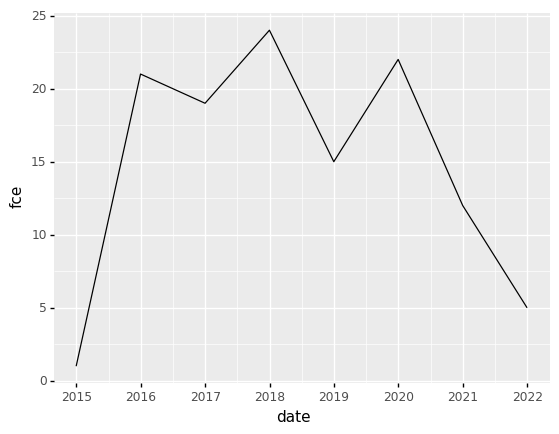

<ggplot: (339300705)>

In [89]:
(
    ggplot(fce_quarters_major_wayne,
          aes(x="date",y="fce"))
    + geom_line()
    +  scale_x_datetime(breaks=date_breaks('1 year'),labels=date_format('%Y')) 
)

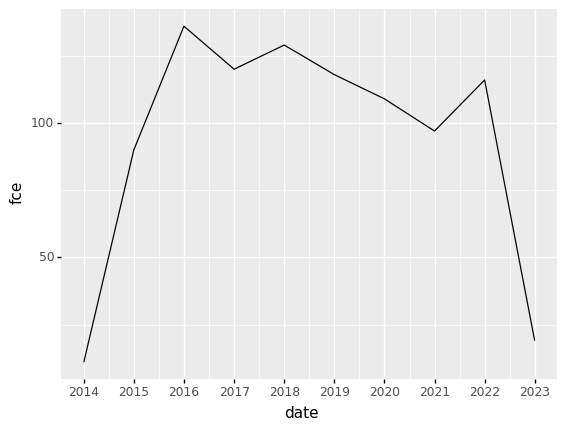

<ggplot: (340008361)>

In [92]:
(
    ggplot(fce_quarters_major,
          aes(x="date",y="fce"))
    + geom_line()
    +  scale_x_datetime(breaks=date_breaks('1 year'),labels=date_format('%Y'))
)

In [ ]:
(
    ggplot(fce_quarters_major,
          aes(x="date",y="fce"))
    + geom_line()
    + facet_wrap('quarter')
    +  scale_x_datetime(breaks=date_breaks('1 year'),labels=date_format('%Y'))
)

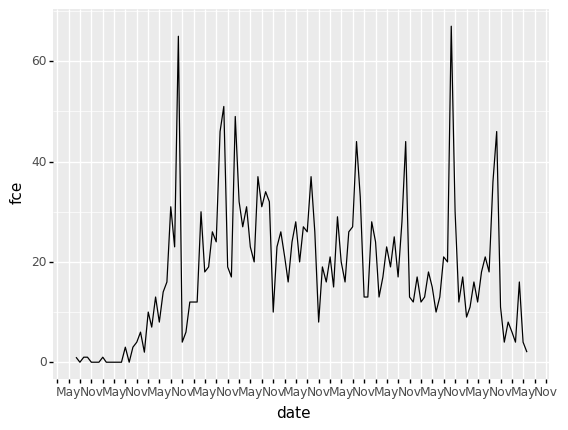

<ggplot: (339221155)>

In [44]:
(
    ggplot(df.query('doc_type.str.contains("FCE") and ~source_id.isin(@major_sources)').resample("M",on="date").size().sort_index().reset_index().rename({0:'fce'},axis=1),
          aes(x="date",y="fce"))
    + geom_line()
    + scale_x_datetime(
     breaks=date_breaks('3 months'),
     labels=custom_date_format2,
     minor_breaks=[])
)